In [53]:
import numpy as np
import nway
import os
import matplotlib.pyplot as plt
from dandi import dandiapi
from pynwb import NWBHDF5IO
from nway.meta_registration import MetaRegistration

In [20]:
dandiset_id = "000336"
dandi_filepath = "sub-1168633075/sub-1168633075_ses-1193555033-1193675745-_ophys.nwb"

authenticate = True
dandi_api_key = os.environ["dandi_api_key"]

In [21]:
if authenticate:
    client = dandiapi.DandiAPIClient(token=dandi_api_key)
else:
    client = dandiapi.DandiAPIClient()
my_dandiset = client.get_dandiset(dandiset_id)

filename = dandi_filepath.split("/")[-1]
filepath = f"./{filename}"
file = my_dandiset.get_asset_by_path(dandi_filepath)

In [14]:
# # this may take awhile, especially if the file to download is large
# file.download(filepath)

# print(f"Downloaded file to {filepath}")

In [39]:
data_dir = "../../../data/dendrite_coupling"
io = NWBHDF5IO(f"{data_dir}/sub-1168633075_ses-1193555033-1193675745-_ophys.nwb", mode="r", load_namespaces=True)
nwb1 = io.read()

io = NWBHDF5IO(f"{data_dir}/sub-1168633075_ses-1193555033-1193675748-_ophys.nwb", mode="r", load_namespaces=True)
nwb2 = io.read()

### Mask Processing

In [ ]:
# generate tiff mask and mask ID dict for each experiment

### Registration

In [124]:
nwb1_avg_img = nwb1.processing["ophys"]["images"]["average_image"]
img_fixed = np.array(nwb1_avg_img) * 255
img_fixed = img_moving.astype(np.uint16)

nwb2_avg_img = nwb2.processing["ophys"]["images"]["average_image"]
img_moving = np.array(nwb2_avg_img) * 255
img_moving = img_moving.astype(np.uint16)

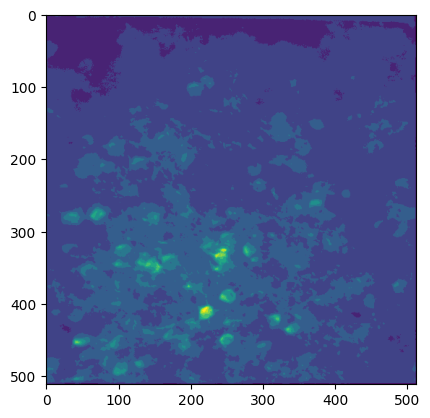

In [125]:
plt.imshow(img_moving)

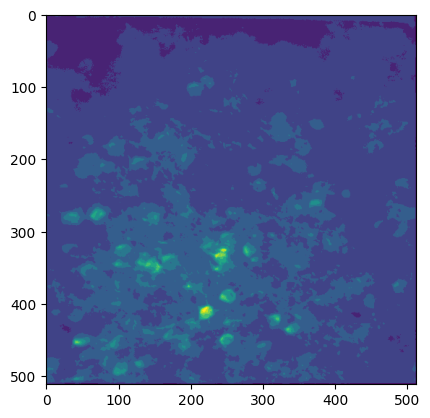

In [126]:
plt.imshow(img_fixed)

In [127]:
meta_reg = MetaRegistration()
meta_reg(img_fixed, img_moving)

In [128]:
meta_reg.best_candidate

['Identity']

In [129]:
meta_reg.best_matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

### Pairwise Cell Matching